### K-Means Clustering algorithm from scratch

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.typing import NDArray

### Helper functions

In [46]:
def euc_dist(point: NDArray, centroids: NDArray):
    """
        `point` shape => (n,)
        `centroids` is ndarray with shape (m, n)
        Returns ndarray with shape (m,), which represents
            distances from the point to center points.
    """
    distances = []
    for centroid in centroids:
        diff = point - centroid
        distances.append(np.sqrt(np.dot(diff.T, diff)))
    return np.array(distances)

In [47]:
def calc_clusters(X: NDArray, centroids: NDArray):
    """
        `X` shape => (m1, n)
        `centroids` shape => (m2, n)
        Returns clusters shape => (m1,)
    """
    clusters = []
    for point in X:
        distances = euc_dist(point, centroids)
        clusters.append(distances.argmin())
    return np.array(clusters)

In [48]:
def calc_centroids(X: NDArray, clusters: NDArray, n_clusters: int):
    """
        `X` shape => (m1, n)
        `clusters` shape => (m1,)
        `n_clusters` is number of clusters
        Returns centroids shape => (m2,n)
    """
    centroids = []
    for i in range(n_clusters):
        centroid = X[clusters==i].mean(axis=0)
        centroids.append(centroid)
    return np.array(centroids)

### 1D

In [134]:
def plot_1d(X: NDArray, centroids: NDArray, clusters: NDArray):
    """
        `X` shape => (m1, 1)
        `centroids` shape => (m2, 1)
        `clusters` shape => (m1,)
    """
    plt.figure(figsize=(8, 0.5))
    plt.scatter(X[:, 0], np.zeros(X.shape[0]), c=clusters)
    plt.scatter(centroids, np.zeros(centroids.shape[0]), marker='*')
    
    for x in centroids:
        plt.axvline(x=x[0])
    plt.show()

#### 1D: Initial

[[ 2.24468281]
 [ 7.14145854]
 [-4.48623183]]


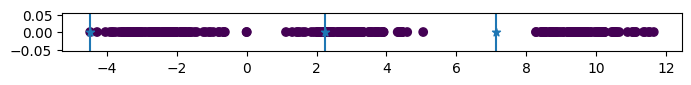

In [ ]:
points_1d = pd.read_csv('1d_points.csv').to_numpy()

n_clusters = 3

np.random.seed(1) # set seed for reproducibility
centroids1d_0 = np.random.uniform(low=points_1d.min(), high=points_1d.max(), size=(n_clusters, points_1d.shape[1]))
print(centroids1d_0)
clusters1d_0 = np.zeros(points_1d.shape)
plot_1d(points_1d, centroids1d_0, clusters1d_0)

#### 1D: Iteration 1

In [51]:
clusters1d_1 = calc_clusters(X=points_1d, centroids=centroids1d_0)
print(clusters1d_1)

[2 1 2 0 2 1 1 2 2 2 1 0 2 0 2 0 0 2 0 1 1 1 1 1 1 0 0 0 2 2 1 0 2 2 2 0 1
 2 0 0 2 0 2 1 0 2 1 0 2 1 0 1 0 0 2 0 2 0 1 1 0 1 0 2 0 1 0 1 1 2 1 0 0 2
 0 0 2 1 2 0 0 2 2 2 0 1 1 0 2 2 0 0 0 1 2 2 1 1 1 2 0 2 0 0 2 0 2 0 1 0 0
 2 1 0 1 1 1 1 1 1 2 0 1 2 2 0 1 0 0 1 0 0 0 0 2 2 2 1 2 2 1 1 0 1 0 1 1 2
 0 2 0 2 2 2 1 0 1 1 0 0 1 2 1 1 0 0 2 2 0 2 0 1 0 1 1 0 0 0 0 1 0 0 1 2 2
 2 2 2 2 0 1 0 1 0 1 0 0 0 0 1 2 2 0 1 0 1 2 1 0 0 2 1 1 1 1 1 0 1 0 2 1 0
 2 2 0 1 2 1 1 1 1 0 1 1 0 0 1 2 1 1 2 0 0 2 0 1 1 0 1 1 2 2 2 1 2 0 2 1 2
 0 1 2 2 0 1 1 1 0 0 0 1 2 0 1 2 0 1 0 1 2 0 2 2 2 0 1 2 1 2 0 1 0 2 0 0 0
 1 1 2 0]


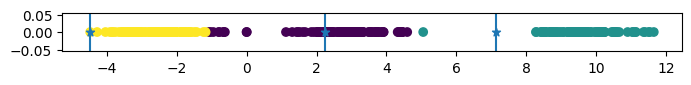

In [52]:
plot_1d(X=points_1d, centroids=centroids1d_0, clusters=clusters1d_1)

In [53]:
centroids1d_1 = calc_centroids(X=points_1d, clusters=clusters1d_1, n_clusters=n_clusters)
print(centroids1d_1)

[[ 2.62891885]
 [ 9.65424119]
 [-2.60553108]]


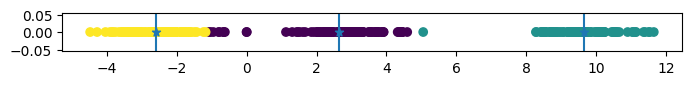

In [54]:
plot_1d(X=points_1d, centroids=centroids1d_1, clusters=clusters1d_1)

In [55]:
# check
all(centroids1d_1 == centroids1d_0)

False

#### 1D: Iteration 2

In [56]:
clusters1d_2 = calc_clusters(X=points_1d, centroids=centroids1d_1)
print(clusters1d_2)

[2 1 2 0 2 1 1 2 2 2 1 0 2 0 2 0 0 2 0 1 1 1 1 1 1 0 0 0 2 2 1 0 2 2 2 0 1
 2 2 0 2 2 2 1 0 2 1 0 2 1 0 1 0 0 2 0 2 0 1 1 0 1 0 2 0 1 0 1 1 2 1 0 0 2
 0 2 2 1 2 2 0 2 2 2 0 1 1 0 2 2 0 0 0 1 2 2 1 1 1 2 2 2 0 0 2 0 2 0 1 0 0
 2 1 0 1 1 1 1 1 1 2 0 1 2 2 0 1 0 0 1 0 0 0 0 2 2 2 1 2 2 1 1 0 1 0 1 1 2
 0 2 0 2 2 2 1 0 1 1 2 0 1 2 1 1 0 0 2 2 2 2 0 0 0 1 1 0 0 0 0 1 0 0 1 2 2
 2 2 2 2 0 1 0 1 0 1 0 0 0 0 1 2 2 0 1 0 1 2 1 0 2 2 1 1 1 1 1 2 1 0 2 1 0
 2 2 0 1 2 1 1 1 1 0 1 1 0 0 1 2 1 1 2 0 0 2 0 1 1 0 1 1 2 2 2 1 2 0 2 1 2
 0 1 2 2 0 1 1 1 0 0 0 1 2 0 1 2 0 1 2 1 2 0 2 2 2 0 1 2 1 2 0 1 0 2 0 0 0
 1 1 2 0]


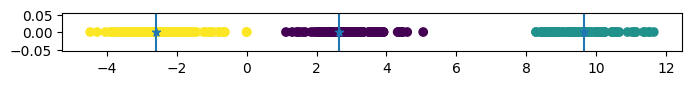

In [57]:
plot_1d(X=points_1d, centroids=centroids1d_1, clusters=clusters1d_2)

In [58]:
centroids1d_2 = calc_centroids(X=points_1d, clusters=clusters1d_2, n_clusters=n_clusters)
print(centroids1d_2)

[[ 2.98252374]
 [ 9.70026753]
 [-2.41146409]]


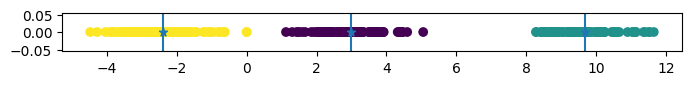

In [59]:
plot_1d(X=points_1d, centroids=centroids1d_2, clusters=clusters1d_2)

In [60]:
# check
all(centroids1d_2 == centroids1d_1)

False

#### 1D: Iteration 3

In [61]:
clusters1d_3 = calc_clusters(X=points_1d, centroids=centroids1d_2)
print(clusters1d_3)

[2 1 2 0 2 1 1 2 2 2 1 0 2 0 2 0 0 2 0 1 1 1 1 1 1 0 0 0 2 2 1 0 2 2 2 0 1
 2 2 0 2 2 2 1 0 2 1 0 2 1 0 1 0 0 2 0 2 0 1 1 0 1 0 2 0 1 0 1 1 2 1 0 0 2
 0 2 2 1 2 2 0 2 2 2 0 1 1 0 2 2 0 0 0 1 2 2 1 1 1 2 2 2 0 0 2 0 2 0 1 0 0
 2 1 0 1 1 1 1 1 1 2 0 1 2 2 0 1 0 0 1 0 0 0 0 2 2 2 1 2 2 1 1 0 1 0 1 1 2
 0 2 0 2 2 2 1 0 1 1 2 0 1 2 1 1 0 0 2 2 2 2 0 0 0 1 1 0 0 0 0 1 0 0 1 2 2
 2 2 2 2 0 1 0 1 0 1 0 0 0 0 1 2 2 0 1 0 1 2 1 0 2 2 1 1 1 1 1 2 1 0 2 1 0
 2 2 0 1 2 1 1 1 1 0 1 1 0 0 1 2 1 1 2 0 0 2 0 1 1 0 1 1 2 2 2 1 2 0 2 1 2
 0 1 2 2 0 1 1 1 0 0 0 1 2 0 1 2 0 1 2 1 2 0 2 2 2 0 1 2 1 2 0 1 0 2 0 0 0
 1 1 2 0]


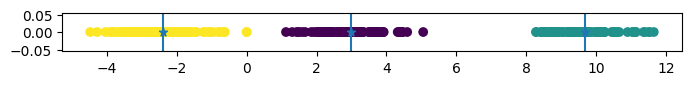

In [62]:
plot_1d(X=points_1d, centroids=centroids1d_2, clusters=clusters1d_3)

In [63]:
centroids1d_3 = calc_centroids(X=points_1d, clusters=clusters1d_3, n_clusters=n_clusters)
print(centroids1d_3)

[[ 2.98252374]
 [ 9.70026753]
 [-2.41146409]]


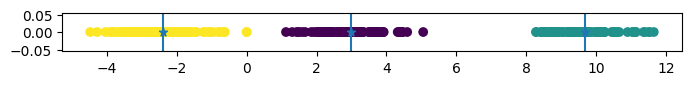

In [64]:
plot_1d(X=points_1d, centroids=centroids1d_3, clusters=clusters1d_3)

In [65]:
# check
all(centroids1d_3 == centroids1d_2)

True

It is True, which means centroids did not change in the last iteration, so final clusters array is `clusters1d_3`.

### 2D

In [95]:
def plot_2d(X: NDArray, centroids: NDArray, clusters: NDArray):
    """
        `X` shape => (m1, 2)
        `centroids` shape => (m2, 2)
        `clusters` shape => (m1,)
    """
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red')

    plt.show()

#### 2D: Initial

In [114]:
points_2d = pd.read_csv('2d_points.csv').to_numpy()
n_clusters = 3

np.random.seed(1) # set seed for reproducibility
centroids2d_0 = np.random.uniform(low=points_2d.min(), high=points_2d.max(), size=(n_clusters, points_2d.shape[1]))
print(centroids2d_0)

[[-0.80968612  5.85993561]
 [-9.9774849  -3.33170673]
 [-6.75283796 -7.9494743 ]]


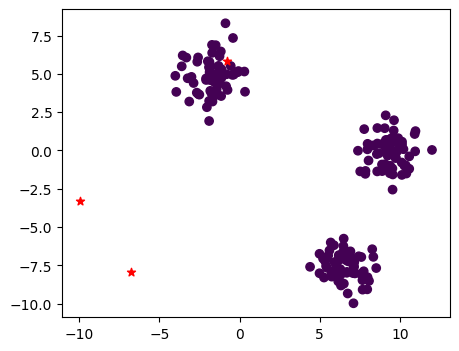

In [115]:
clusters2d_0 = np.zeros(points_2d.shape[0])
plot_2d(X=points_2d, centroids=centroids2d_0, clusters=clusters2d_0)

#### 2D: Iteration 1

In [116]:
clusters2d_1 = calc_clusters(X=points_2d, centroids=centroids1d_0)
print(clusters2d_1)

[0 0 2 1 2 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 2 0 0 0 1 0 0 0 1 0 0 0 0 2 0
 1 0 1 0 1 0 0 2 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0]


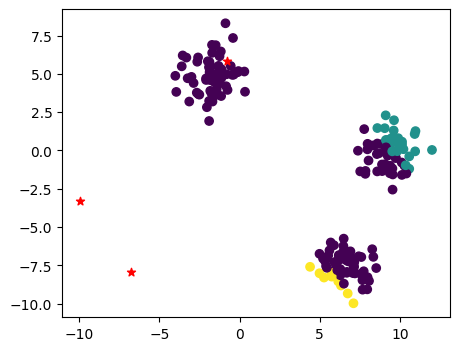

In [117]:
plot_2d(X=points_2d, centroids=centroids2d_0, clusters=clusters2d_1)

In [118]:
centroids2d_1 = calc_centroids(X=points_2d, clusters=clusters2d_1, n_clusters=n_clusters)
print(centroids2d_1)

[[ 3.6805625  -0.7506875 ]
 [ 9.84709677  0.54354839]
 [ 5.83333333 -8.53888889]]


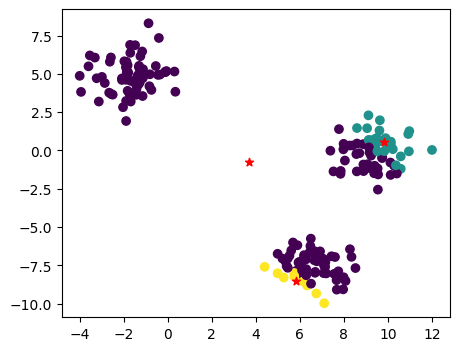

In [119]:
plot_2d(X=points_2d, centroids=centroids2d_1, clusters=clusters2d_1)

In [120]:
# check
np.all(centroids2d_1 == centroids2d_0)

np.False_

#### 2D: Iteration 2

In [121]:
clusters2d_2 = calc_clusters(X=points_2d, centroids=centroids2d_1)
print(clusters2d_2)

[2 0 2 1 2 2 0 2 1 0 1 0 2 2 2 1 1 0 2 1 0 2 2 0 2 0 1 1 0 0 1 0 2 0 2 2 2
 1 1 1 1 1 1 0 2 0 1 2 1 1 0 1 1 0 2 0 1 0 1 1 1 0 2 2 0 2 1 1 1 2 0 0 0 0
 2 1 0 2 2 0 0 0 1 2 2 2 1 2 0 0 0 0 2 0 2 1 1 0 2 0 2 0 2 2 0 0 0 0 1 1 0
 2 2 0 1 1 0 0 1 1 1 1 0 2 2 0 0 0 1 0 0 1 2 2 0 0 1 0 2 2 2 2 1 1 1 1 1 2
 2 1 1 1 2 2 1 1 1 2 0 2 0 0 2 0 2 1 0 1 0 1 0 1 1 2 1 1 0 0 0 0 0 2 2 2 1
 0 2 2 1 2 2 1 2 2 2 0 2 1 1 1]


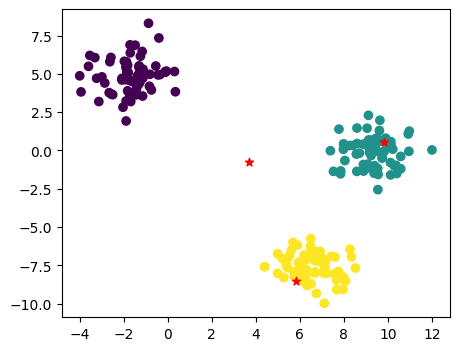

In [123]:
plot_2d(X=points_2d, centroids=centroids2d_1, clusters=clusters2d_2)

In [124]:
centroids2d_2 = calc_centroids(X=points_2d, clusters=clusters2d_2, n_clusters=n_clusters)
print(centroids2d_2)

[[-1.66970149  4.8538806 ]
 [ 9.34895522 -0.12253731]
 [ 6.54757576 -7.5319697 ]]


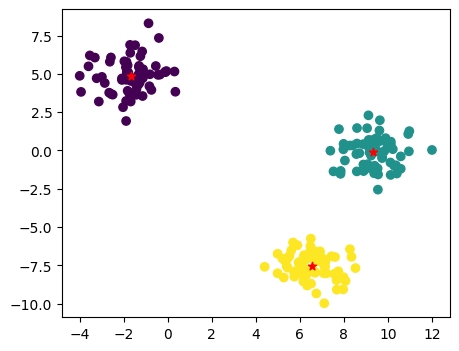

In [125]:
plot_2d(X=points_2d, centroids=centroids2d_2, clusters=clusters2d_2)

In [127]:
# check
np.all(centroids2d_2 == centroids2d_1)

np.False_

#### 2D: Iteration 3

In [128]:
clusters2d_3 = calc_clusters(X=points_2d, centroids=centroids2d_2)
print(clusters2d_3)

[2 0 2 1 2 2 0 2 1 0 1 0 2 2 2 1 1 0 2 1 0 2 2 0 2 0 1 1 0 0 1 0 2 0 2 2 2
 1 1 1 1 1 1 0 2 0 1 2 1 1 0 1 1 0 2 0 1 0 1 1 1 0 2 2 0 2 1 1 1 2 0 0 0 0
 2 1 0 2 2 0 0 0 1 2 2 2 1 2 0 0 0 0 2 0 2 1 1 0 2 0 2 0 2 2 0 0 0 0 1 1 0
 2 2 0 1 1 0 0 1 1 1 1 0 2 2 0 0 0 1 0 0 1 2 2 0 0 1 0 2 2 2 2 1 1 1 1 1 2
 2 1 1 1 2 2 1 1 1 2 0 2 0 0 2 0 2 1 0 1 0 1 0 1 1 2 1 1 0 0 0 0 0 2 2 2 1
 0 2 2 1 2 2 1 2 2 2 0 2 1 1 1]


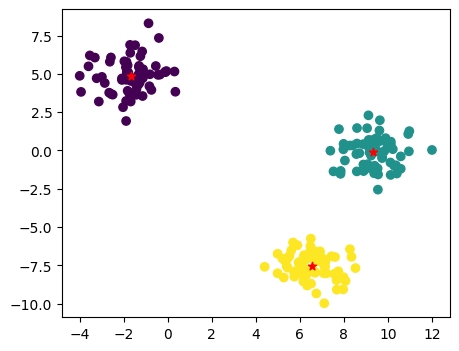

In [129]:
plot_2d(X=points_2d, centroids=centroids2d_2, clusters=clusters2d_3)

In [131]:
centroids2d_3 = calc_centroids(X=points_2d, clusters=clusters2d_3, n_clusters=n_clusters)
print(centroids2d_3)

[[-1.66970149  4.8538806 ]
 [ 9.34895522 -0.12253731]
 [ 6.54757576 -7.5319697 ]]


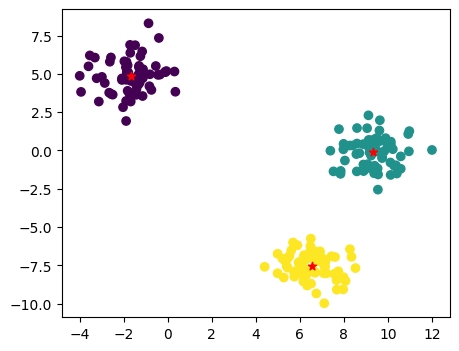

In [132]:
plot_2d(X=points_2d, centroids=centroids2d_3, clusters=clusters2d_3)

In [133]:
np.all(centroids2d_3 == centroids2d_2)

np.True_

It is True, which means centroids did not change in the last iteration, so final clusters array is `clusters2d_3`.

### 3D

In [150]:
def plot_3d(X: NDArray, centroids: NDArray, clusters: NDArray):
    """
        `X` shape => (m1, 3)
        `centroids` shape => (m2, 3)
        `clusters` shape => (m1,)
    """
    fig = plt.figure(figsize=(6, 4))
    ax = plt.axes(projection="3d")

    ax.scatter3D(X[:,0], X[:,1], X[:,2])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

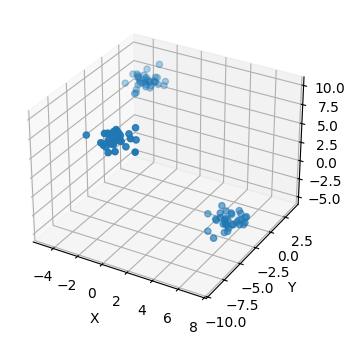

In [ ]:
points_3d = pd.read_csv("3d_points.csv").to_numpy()



plot_3d(X=points_3d, centroids=None, clusters=None)